In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [58]:
df = pd.read_csv('/content/survey lung cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [59]:
print(df.isnull().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [60]:
df.duplicated().sum()
df = df.drop_duplicates()

In [61]:
# Assuming 'LUNG_CANCER' is the target variable
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Convert categorical features to numerical using one-hot encoding for X
X = pd.get_dummies(X, columns=['GENDER'], drop_first=True)

# Convert target variable 'LUNG_CANCER' to numerical (0/1) for y
y = y.map({'NO': 0, 'YES': 1})

# split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    shuffle=True,
    stratify=y
)
# Print
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (207, 15)
X_test shape: (69, 15)
y_train shape: (207,)
y_test shape: (69,)


In [62]:
l = LogisticRegression(max_iter=20)
model = l.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[ 2  8]
 [ 0 59]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.20      0.33        10
           1       0.88      1.00      0.94        59

    accuracy                           0.88        69
   macro avg       0.94      0.60      0.63        69
weighted avg       0.90      0.88      0.85        69



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

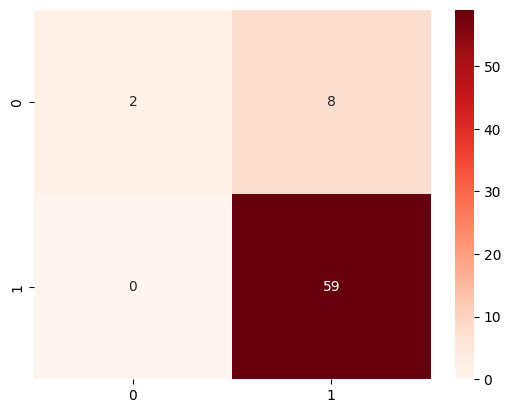

In [63]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
plt

/tmp/ipython-input-2974120753.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = [can_count[1],can_count[0]]


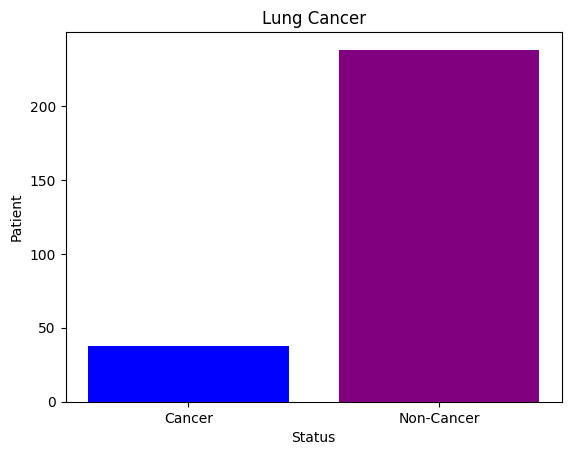

In [64]:
import matplotlib.pyplot as plt

can_count = df['LUNG_CANCER'].value_counts()

label = ['Cancer','Non-Cancer']
count = [can_count[1],can_count[0]]

plt.bar(label,count,color=['blue','purple'])
plt.title('Lung Cancer')
plt.xlabel("Status")
plt.ylabel("Patient")
plt.show()